### Importacion de Librerias necesarias

In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import statsmodels.graphics.tsaplots as sgt 
import statsmodels.tsa.stattools as sts 
from statsmodels.tsa.seasonal import seasonal_decompose
import seaborn as sns
sns.set()

### Carga y transformacion de datos 

In [3]:
raw_csv_data = pd.read_csv("Index_modified.csv") 
df_comp=raw_csv_data.copy()
df_comp.set_index("date", inplace=True)
'''df_comp=df_comp.asfreq('b')
df_comp=df_comp.fillna(method='ffill')'''

"df_comp=df_comp.asfreq('b')\ndf_comp=df_comp.fillna(method='ffill')"

### Verificacion de nulos

In [4]:
df_comp.isna().sum()

spx       0
dax       0
ftse      0
nikkei    0
dtype: int64

### Adicion de la capitalizacion de mercado en el dataframe

In [5]:
df_comp['market_value']=df_comp.spx

In [6]:
## Eliminacion de columnas sobre dataframe original
del df_comp['spx']
del df_comp['dax']
del df_comp['ftse']
del df_comp['nikkei']
## Separacion de la data para evaluar la eficacia de la modelo para entrenar y predecir los datos
size = int(len(df_comp)*0.8)
df, df_test = df_comp.iloc[:size], df_comp.iloc[size:]

### Ruido Blanco

El ruido blanco es un término que se utiliza para describir un tipo de error aleatorio en un modelo estadístico, particularmente en modelos de series temporales,con ciertas caracteristicas
* <b> Media Constante </b>
* <b> Varianza Constante </b> = <b>Homocestacidad</b>
* <b> Independencia </b>
* <b> Normalidad </b>

$$E(\varepsilon_{t})=0\\
Var(\varepsilon_{t})=\sigma_{t}^2\\
Cov(\varepsilon_{t},\varepsilon_{t+k})=0$$
El ruido blanco es un supuesto importante en la modelización de series temporales y es fundamental para la estimación de modelos econométricos, como el modelo de regresión lineal y los modelos ARIMA (Modelos Autorregresivos de Media Móvil Integrada).

In [7]:
wn = np.random.normal(loc = df.market_value.mean(), scale = df.market_value.std(), size = len(df))

In [8]:
df['wn'] = wn

C:\Users\ediso\AppData\Local\Temp\ipykernel_5160\672873062.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['wn'] = wn


In [9]:
df.describe()

,market_value,wn
count,6201.000000,6201.000000
mean,1272.966623,1279.245472
std,468.050677,472.389160
min,438.920000,-285.147564
25%,987.761613,956.538014
50%,1227.162167,1284.544956
75%,1451.340000,1599.642056
max,2575.205878,3060.107185


### Grafico del serie del Ruido Blanco

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


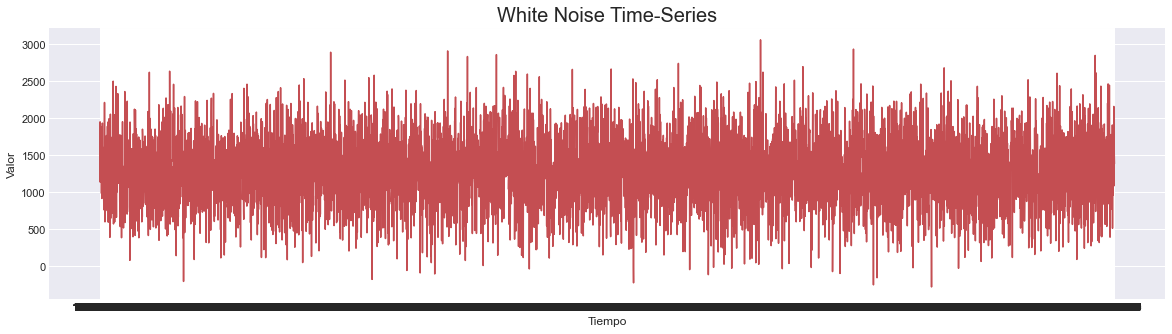

In [17]:
plt.figure(figsize=(20, 5))
plt.plot(df.wn,color='r',linestyle='-', linewidth=1.5, label='White Noise')
plt.title("White Noise Time-Series", size= 24)
plt.xlabel('Tiempo')
plt.ylabel('Valor')
plt.title("White Noise Time-Series", size=20)
plt.grid(True)
plt.legend()
plt.show()

Grafica de Serie de tiempo de la cotizacion del precio sobre el activo financiero S&P 500 entre 1994 a 2023 

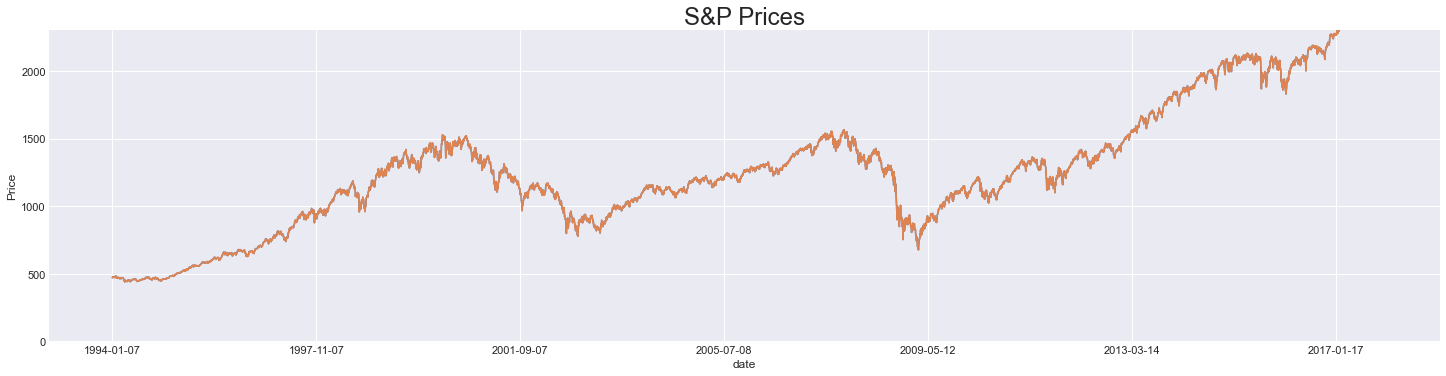

In [19]:
df.market_value.plot(figsize=(20,5))
df['market_value'].plot()
plt.grid(True)
plt.tight_layout()
plt.title("S&P Prices", size = 24)
plt.ylabel("Price")
plt.ylim(0,2300)
plt.show()

### Random Walk

Se refiere a un modelo en el que una variable sigue una secuencia de movimientos aleatorios, lo que significa que los cambios en la variable en cada período de tiempo son completamente impredecibles y están influenciados únicamente por un componente estocástico.
$$Y_{t}=Y_{t-1}+\varepsilon_{t}\\
Y_{t} = Variable \ en \ \ tiempo \ \ t \ \\
Y_{t-1} = Variable \ en \ \ tiempo \ \ t-1 \ \\
\varepsilon_{t} = Término \ de \ \ error \ aleatorio \ en \ \ el \ \ tiempo \ t \ que \ representa \\\ el \ componente \ estocástico \ o \ aleatorio \ del \ modelo.
$$
 El random walk implica que el valor futuro de la variable depende completamente de su valor anterior y de un elemento de error aleatorio. Esto significa que las predicciones en un modelo de paseo aleatorio son bastante limitadas, ya que no se pueden hacer pronósticos precisos a largo plazo, dado que los cambios futuros son impredecibles.
 Un resultado importante relacionado con el random walk es que, en ausencia de información adicional o cambios estructurales en los datos, se espera que el valor futuro de la variable sea igual al último valor observado, lo que se conoce como la "hipótesis de paseo aleatorio sin deriva". En este caso, cualquier desviación del valor anterior se considera ruido estocástico.

In [ ]:
rw = pd.read_csv("RandWalk.csv")
rw.date = pd.to_datetime(rw.date, dayfirst = True)
rw.set_index("date", inplace = True)
rw = rw.asfreq('b')
##No hay archivo csv ##no run

In [12]:
rw.describe() ##Descripcion de los datos

,price
count,5021.000000
mean,1269.944293
std,444.216793
min,585.483034
25%,931.550429
50%,1156.363045
75%,1488.362029
max,2715.508720


In [13]:
## Adicion de la columna de la cotizacion sobre los precios de las acciones
df['rw'] = rw.price 

In [14]:
df.head() #Muesrta de las columnas

,market_value,wn,rw
date,,,
1994-01-07,469.90,1059.089464,1122.139662
1994-01-10,475.27,885.137922,1080.347860
1994-01-11,474.13,680.919810,1082.095245
1994-01-12,474.17,1555.430981,1083.639265
1994-01-13,472.47,1157.200035,1067.146255


Grafica de Serie de tiempo de la cotizaciones de los precios sobre los activos financieros S&P 500 versus Random Walk entre 1994 a 2023 

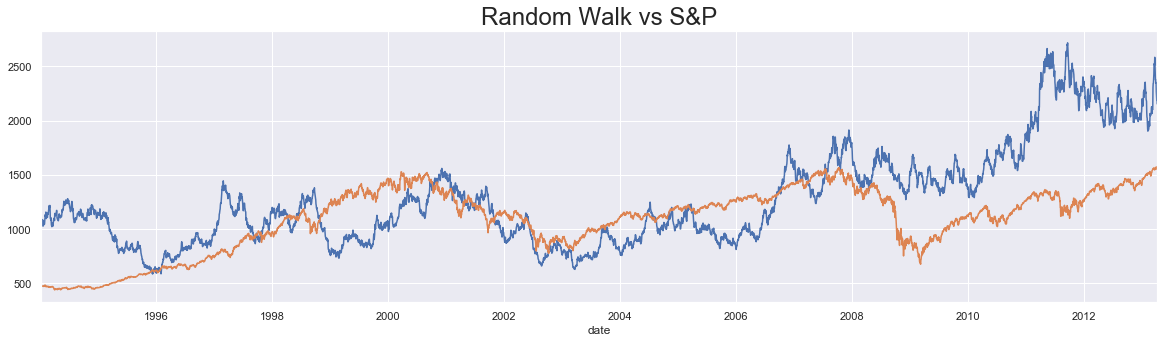

In [15]:
df.rw.plot(figsize = (20,5))
df.market_value.plot()
plt.title("Random Walk vs S&P", size = 24)
plt.show()

### Estacionariedad

Las pruebas de estacionariedad se refiere a las propiedades que deberian cumplir ciertos parametros con situacion teoricas,pues se puede identificar patrones temporales, tendencias y ciclos en los datos con respecto a su media y varianza constante,en consecuencia permite determinar la necesidad de aplicar transformaciones a los datos al ajustar modelos diferentes (ARIMA) para lograr la estacionariedad antes de realiar un analisis mas profundo para una proxima prediccion suele ser mas precisa,asimismo en la estimacion del modelo econometrico,los parametros tambien coinciden en su precision.
Algunas pruebas estadísticas, como la Prueba de Dickey-Fuller Estacional Aumentada (SADF) y la Prueba de Kwiatkowski-Phillips-Schmidt-Shin Estacional (S-PKPSS), están diseñadas específicamente para detectar estacionalidad en los datos.

In [16]:
sts.adfuller(df.market_value) ##Prueba de estacionariedad

(-1.7369847452352427,
 0.4121645696770626,
 18,
 5002,
 {'1%': -3.431658008603046,
  '5%': -2.862117998412982,
  '10%': -2.567077669247375},
 39904.880607487445)

In [17]:
sts.adfuller(df.wn) ##Prueba de estacionariedad

(-69.20331416010461,
 0.0,
 0,
 5020,
 {'1%': -3.431653316130827,
  '5%': -2.8621159253018247,
  '10%': -2.5670765656497516},
 70746.80114417049)

In [18]:
sts.adfuller(df.rw) ##Prueba de estacionariedad

(-1.3286073927689723,
 0.6159849181617383,
 24,
 4996,
 {'1%': -3.4316595802782865,
  '5%': -2.8621186927706463,
  '10%': -2.567078038881065},
 46299.333497595144)

### Estacionalidad

La estacionalidad se refiere a patrones que se repiten a intervalos regulares en una serie temporal,pues permite prever tendencias futuras y planificar, en consecuencia, su compresion considera la interpretacion de los ciclos para la toma de decisiones,ya que se puede observar e identificar anomalias o desviaciones de los datos,no obstante son muy adecuados para los modelos SARIMA (Seasonal Autoregressive Integrated Moving Average), permiten una modelización más precisa, lo que a su vez conduce a mejores pronósticos.

### Prueba de Descomposicion de la serie de tiempo

 Se descompone la serie en componentes de tendencia, estacionalidad y residuos para identificar claramente los patrones estacionales.

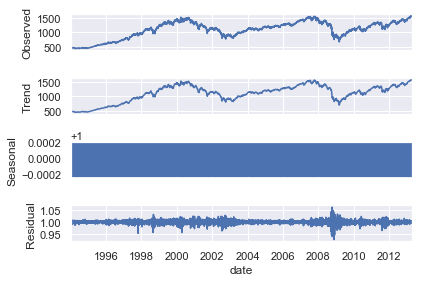

In [20]:
s_dec_multiplicative = seasonal_decompose(df.market_value, model = "multiplicative")
s_dec_multiplicative.plot()
plt.show()

### Pruebas de Autocorrelacion

Se examinan los coeficientes de autocorrelación y autocorrelación parcial en la serie para buscar patrones estacionales

### ACF **Funcion de Autocorrelacion Completa**

La ACF es una herramienta importante para examinar la correlación entre los valores de una serie temporal y sus retrasos pasados a lo largo del tiempo.Ya que puedes visualizar cómo la serie temporal se correlaciona consigo misma en diferentes rezagos (lags). 

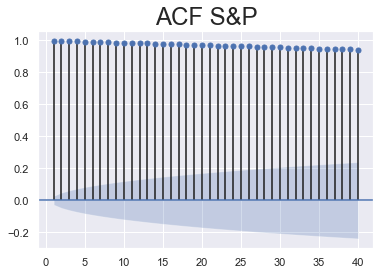

In [29]:
sgt.plot_acf(df.market_value, lags = 40, zero = False)
plt.title("ACF S&P", size = 24)
plt.show()

El gráfico resultante mostrará la ACF para diferentes retrasos (lags) a lo largo de la serie temporal. Cada barra o punto en el gráfico representa la correlación entre los valores de la serie en el lag correspondiente. Si la ACF muestra patrones significativos de correlación en ciertos lags, esto puede indicar estacionalidad o tendencias en los datos, lo que puede ser útil para modelar y pronosticar.

### PACF **Funcion de autocorrelacion parcial**

La diferencia clave entre la ACF (Función de Autocorrelación) y la PACF es que la PACF mide la correlación entre dos valores en un retraso dado después de eliminar el efecto de los retrasos intermedios. Esto permite identificar la correlación directa entre dos valores separados por un número específico de períodos, lo que es útil para determinar la estructura de un modelo de series temporales, especialmente en modelos ARMA (Modelo Autorregresivo de Media Móvil).

##### Grafico de autocorrelacion parcial del activo financiero S&P 

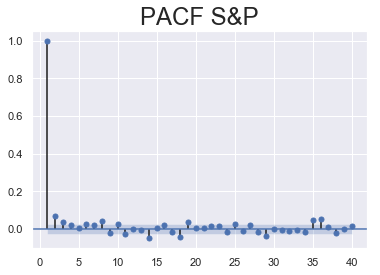

In [27]:
sgt.plot_pacf(df.market_value, lags = 40, zero = False, method = ('ols'))
plt.title("PACF S&P", size = 24)
plt.show()

##### Grafico de autocorrelacion parcial del activo financiero WN

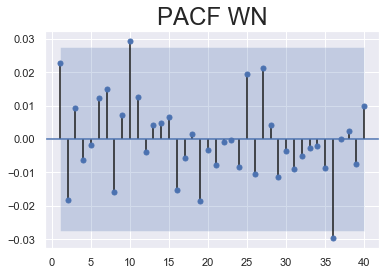

In [28]:
sgt.plot_pacf(df.wn, lags = 40, zero = False, method = ('ols'))
plt.title("PACF WN", size = 24)
plt.show()

El gráfico resultante mostrará la PACF para diferentes retrasos (lags) a lo largo de la serie temporal. Cada barra o punto en el gráfico representa la correlación parcial entre los valores de la serie en el lag correspondiente después de eliminar el efecto de los retrasos intermedios. La PACF es útil para identificar la estructura de un modelo de series temporales, especialmente en modelos autorregresivos.